In [125]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn.datasets as dta

In [126]:
csv_path = r'Us_Accidents_Arizona_DEC20.csv'

In [127]:
us_data_df = pd.read_csv(csv_path)
us_data_cleaned = us_data_df[['ID','TMC','Severity','Start_Time','End_Time','City','County','State','Zipcode','Country','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Sunrise_Sunset','Stop','Traffic_Signal']]
us_data_cleaned

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020 8:33,12/31/2020 9:18,Sun City West,Maricopa,AZ,85375-1800,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020 9:32,12/31/2020 11:03,Wickenburg,Maricopa,AZ,85390-3367,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
2,A-513397,201,2,12/31/2020 12:54,12/31/2020 19:20,Lake Havasu City,Mohave,AZ,86404,US,60.0,10.0,12.0,0.0,Fair,Day,True,False
3,A-513398,201,3,12/31/2020 16:04,12/31/2020 17:28,Avondale,Maricopa,AZ,85323,US,57.0,10.0,5.0,NaN,Cloudy,Day,False,False
4,A-513399,201,2,12/31/2020 18:47,12/31/2020 19:48,Prescott,Yavapai,AZ,86303,US,36.0,10.0,6.0,0.0,Cloudy,Night,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,A-1048129,201,2,10/9/2019 21:08,10/9/2019 21:57,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15093,A-1048130,201,2,10/9/2019 21:10,10/9/2019 21:58,Tucson,Pima,AZ,85712,US,75.0,10.0,6.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019 21:11,10/9/2019 21:58,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False
15095,A-1048132,201,2,10/9/2019 21:10,10/9/2019 21:57,Tempe,Maricopa,AZ,85281-3715,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [128]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_maricopa = us_data_cleaned.loc[us_data_cleaned['County'] == 'Maricopa']
us_data_maricopa

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020 8:33,12/31/2020 9:18,Sun City West,Maricopa,AZ,85375-1800,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020 9:32,12/31/2020 11:03,Wickenburg,Maricopa,AZ,85390-3367,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
5,A-513400,201,2,12/31/2020 4:52,12/31/2020 6:07,Phoenix,Maricopa,AZ,85027-4008,US,40.0,10.0,0.0,0.0,Fair,Night,False,True
8,A-513403,201,2,12/31/2020 6:40,12/31/2020 7:10,Phoenix,Maricopa,AZ,85020-1812,US,40.0,10.0,0.0,0.0,Fair,Night,False,False
9,A-513404,201,2,12/31/2020 6:54,12/31/2020 7:24,Phoenix,Maricopa,AZ,85022,US,39.0,10.0,0.0,0.0,Fair,Night,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,10/9/2019 19:45,10/9/2019 21:01,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15090,A-1048127,201,3,10/9/2019 19:46,10/9/2019 21:03,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15092,A-1048129,201,2,10/9/2019 21:08,10/9/2019 21:57,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019 21:11,10/9/2019 21:58,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [129]:
#Update the Start_Time and End_Time columns formatting to remove time stamp
us_data_maricopa['Start_Time']=us_data_maricopa['Start_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['End_Time']=us_data_maricopa['End_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['Zipcode']=us_data_maricopa['Zipcode'].str.split('-', expand=True)[0]
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020,12/31/2020,Sun City West,Maricopa,AZ,85375,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020,12/31/2020,Wickenburg,Maricopa,AZ,85390,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
5,A-513400,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85027,US,40.0,10.0,0.0,0.0,Fair,Night,False,True
8,A-513403,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85020,US,40.0,10.0,0.0,0.0,Fair,Night,False,False
9,A-513404,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85022,US,39.0,10.0,0.0,0.0,Fair,Night,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,10/9/2019,10/9/2019,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15090,A-1048127,201,3,10/9/2019,10/9/2019,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15092,A-1048129,201,2,10/9/2019,10/9/2019,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019,10/9/2019,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [130]:
#convert dates
us_data_maricopa['End_Time'] = pd.to_datetime(us_data_maricopa['End_Time'])
us_data_maricopa['Start_Time'] = pd.to_datetime(us_data_maricopa['Start_Time'])

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
#creating new columns for Month and Day to create seasons columns
us_data_maricopa["Month"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).month
us_data_maricopa["Day"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).day
us_data_maricopa["Year"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).year
us_data_maricopa["Season"] = ""
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,Month,Day,Year,Season
0,A-513395,201,2,2020-12-31,2020-12-31,Sun City West,Maricopa,AZ,85375,US,...,5.0,0.0,Cloudy,Day,False,True,12,31,2020,
1,A-513396,201,2,2020-12-31,2020-12-31,Wickenburg,Maricopa,AZ,85390,US,...,3.0,0.0,Light Drizzle,Day,False,False,12,31,2020,
5,A-513400,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85027,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,
8,A-513403,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85020,US,...,0.0,0.0,Fair,Night,False,False,12,31,2020,
9,A-513404,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85022,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,13.0,0.0,Fair,Night,False,False,10,9,2019,
15090,A-1048127,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,13.0,0.0,Fair,Night,False,False,10,9,2019,
15092,A-1048129,201,2,2019-10-09,2019-10-09,Glendale,Maricopa,AZ,85307,US,...,0.0,0.0,Fair,Night,False,True,10,9,2019,
15094,A-1048131,201,2,2019-10-09,2019-10-09,Tempe,Maricopa,AZ,85283,US,...,10.0,0.0,Partly Cloudy,Night,False,False,10,9,2019,


In [132]:
#Drop any data from 2019
us_data_maricopa = us_data_maricopa[us_data_maricopa['Year'] == 2020]
us_data_maricopa


,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,Month,Day,Year,Season
0,A-513395,201,2,2020-12-31,2020-12-31,Sun City West,Maricopa,AZ,85375,US,...,5.0,0.0,Cloudy,Day,False,True,12,31,2020,
1,A-513396,201,2,2020-12-31,2020-12-31,Wickenburg,Maricopa,AZ,85390,US,...,3.0,0.0,Light Drizzle,Day,False,False,12,31,2020,
5,A-513400,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85027,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,
8,A-513403,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85020,US,...,0.0,0.0,Fair,Night,False,False,12,31,2020,
9,A-513404,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85022,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,A-982294,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85016,US,...,3.0,0.0,Partly Cloudy,Night,False,True,1,3,2020,
13311,A-982295,201,2,2020-01-03,2020-01-03,El Mirage,Maricopa,AZ,85335,US,...,0.0,0.0,Partly Cloudy,Night,False,True,1,3,2020,
13313,A-982297,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85042,US,...,3.0,0.0,Fair,Night,False,True,1,3,2020,
13314,A-982298,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85031,US,...,6.0,0.0,Fair,Night,False,True,1,3,2020,


In [133]:
#inserting seasons columns based on month and day
us_data_maricopa.loc[(us_data_maricopa["Month"] == 1), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] == 2), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 3) & (us_data_maricopa["Month"] <= 5), ["Season"]] = "Spring"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 6) & (us_data_maricopa["Month"] <= 8), ["Season"]] = "Summer"

us_data_maricopa.loc[(us_data_maricopa["Month"] >= 9) & (us_data_maricopa["Month"] <= 11), ["Season"]] = "Autumn"

us_data_maricopa.loc[(us_data_maricopa["Month"] == 12), ["Season"]] = "Winter"
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,Month,Day,Year,Season
0,A-513395,201,2,2020-12-31,2020-12-31,Sun City West,Maricopa,AZ,85375,US,...,5.0,0.0,Cloudy,Day,False,True,12,31,2020,Winter
1,A-513396,201,2,2020-12-31,2020-12-31,Wickenburg,Maricopa,AZ,85390,US,...,3.0,0.0,Light Drizzle,Day,False,False,12,31,2020,Winter
5,A-513400,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85027,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,Winter
8,A-513403,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85020,US,...,0.0,0.0,Fair,Night,False,False,12,31,2020,Winter
9,A-513404,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85022,US,...,0.0,0.0,Fair,Night,False,True,12,31,2020,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,A-982294,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85016,US,...,3.0,0.0,Partly Cloudy,Night,False,True,1,3,2020,Winter
13311,A-982295,201,2,2020-01-03,2020-01-03,El Mirage,Maricopa,AZ,85335,US,...,0.0,0.0,Partly Cloudy,Night,False,True,1,3,2020,Winter
13313,A-982297,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85042,US,...,3.0,0.0,Fair,Night,False,True,1,3,2020,Winter
13314,A-982298,201,2,2020-01-03,2020-01-03,Phoenix,Maricopa,AZ,85031,US,...,6.0,0.0,Fair,Night,False,True,1,3,2020,Winter


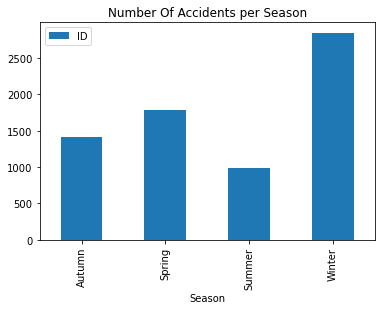

In [134]:
#Average Number of accidents per month/season
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count = us_data_maricopa.groupby('Season').count()
season_count_clean = season_count['ID']
season_count_clean = pd.DataFrame(season_count_clean)
season_count_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [135]:
#get count of days per Season
#count_seasons_grouped = count_seasons.groupby['Season'].
count_seasons = us_data_maricopa.groupby(['Season'])
count_seasons = count_seasons['Start_Time'].nunique()
count_seasons

Season
Autumn    90
Spring    86
Summer    61
Winter    89
Name: Start_Time, dtype: int64

In [136]:
#Highest per day
highest_per_days = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].max()]




,ID,TMC,Severity,End_Time,City,County,State,Zipcode,Country,Temperature(F),...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,Month,Day,Year,Season
Start_Time,,,,,,,,,,,,,,,,,,,,,
2020-02-13,73,3,2,1,10,1,1,48,1,18,...,6,1,2,2,2,2,1,1,1,1
2020-02-20,73,3,2,1,11,1,1,47,1,17,...,8,1,4,2,2,2,1,1,1,1


In [137]:
lowest_per_day = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].min()]

In [138]:
#average number of accidents per recorded day
average_per_day = highest_per_day['ID'].mean()
average_per_day

21.55521472392638

In [140]:
#Accident Location vs Total Annual Accidents
#Cities with Most Accidents (Top 5)
city_count = us_data_maricopa.groupby(['City']).nunique()
top_5_cities = city_count.sort_values('ID', ascending=False)


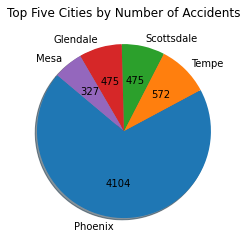

In [157]:
x_values = ['Phoenix','Tempe','Scottsdale','Glendale','Mesa']
y_values = [4104,572,475,475,327]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct
plt.pie(y_values,labels=x_values,startangle=140,autopct=make_autopct(y_values),shadow=True)
plt.title("Top Five Cities by Number of Accidents")
plt.show()

In [168]:
#Highest Days and Weather conditions
feb13_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-13')]
feb20_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-20')]


,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,Month,Day,Year,Season
12649,A-963842,241,3,2020-02-20,2020-02-20,Wickenburg,Maricopa,AZ,85390,US,...,7.0,0.0,Fair,Day,False,False,2,20,2020,Winter
12651,A-963844,201,2,2020-02-20,2020-02-20,Wickenburg,Maricopa,AZ,85390,US,...,3.0,0.0,Cloudy,Day,False,False,2,20,2020,Winter
12652,A-963845,201,3,2020-02-20,2020-02-20,Buckeye,Maricopa,AZ,85326,US,...,8.0,0.0,Haze,Night,False,False,2,20,2020,Winter
12654,A-963848,201,2,2020-02-20,2020-02-20,Mesa,Maricopa,AZ,85206,US,...,5.0,0.0,Fair,Night,False,False,2,20,2020,Winter
12655,A-963849,201,2,2020-02-20,2020-02-20,Phoenix,Maricopa,AZ,85006,US,...,5.0,0.0,Fair,Night,False,True,2,20,2020,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,A-963932,201,2,2020-02-20,2020-02-20,Phoenix,Maricopa,AZ,85041,US,...,3.0,0.0,Cloudy,Night,False,True,2,20,2020,Winter
12739,A-963933,241,2,2020-02-20,2020-02-20,Scottsdale,Maricopa,AZ,85256,US,...,3.0,0.0,Cloudy,Night,False,False,2,20,2020,Winter
12740,A-963934,201,2,2020-02-20,2020-02-20,Phoenix,Maricopa,AZ,85033,US,...,3.0,0.0,Cloudy,Night,False,True,2,20,2020,Winter
12741,A-963935,201,2,2020-02-20,2020-02-20,Glendale,Maricopa,AZ,85306,US,...,5.0,0.0,Cloudy,Night,False,True,2,20,2020,Winter
